# Adult Income Classification Experiments

## Import Libraries Needed for Experiment

In [ ]:
# Import Python Libraries
import sys
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTENC

# Append Path to Prevent Module Not Found Errors in Notebooks
sys.path.append('C:/Users/ameen/OneDrive/Documents/github/Classic-ML-Models/src')
warnings.filterwarnings('ignore')

# Import Custom Modules/Classes/Functions
from utils.helpers.etl_helpers import extract_csv
from utils.helpers.visual_helpers import cat_distribution, num_distribution
from utils.aws.s3 import S3Buckets
s3_conn = S3Buckets.credentials()

## Import Dataset and View Dataset Information

In [ ]:
csv_file = s3_conn.read_file("jibbs-raw-datasets", "uncleaned_AdultData.csv")
df = extract_csv(csv_file)

INFO: Skipping checksum validation. Response did not contain one of the following algorithms: ['crc32', 'sha1', 'sha256'].
INFO: File 'uncleaned_AdultData.csv' read successfully from bucket 'jibbs-raw-datasets'.


In [14]:
# Make a copy of the dataframe and View the Data Info
adult = df.copy()
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Identify Datatypes in Dataset

In [35]:
# Identifying numerical columns
numerical_cols = adult.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identifying categorical columns
categorical_cols = adult.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']


## Check Data Distributions

In [28]:
for col in categorical_cols.drop("salary"):
    print(f"Number of Unique values in {col}: {adult[col].nunique()}")

Number of Unique values in workclass: 9
Number of Unique values in education: 16
Number of Unique values in marital-status: 7
Number of Unique values in occupation: 15
Number of Unique values in relationship: 6
Number of Unique values in race: 5
Number of Unique values in sex: 2
Number of Unique values in native-country: 42


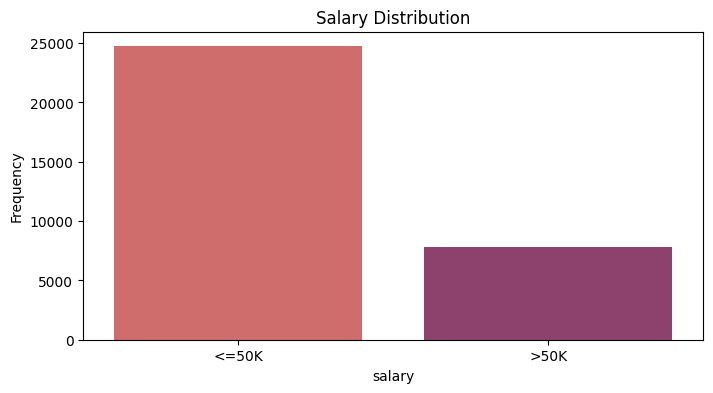

In [57]:
# Visualize the Distribution of the Target
cat_distribution(adult, "salary")

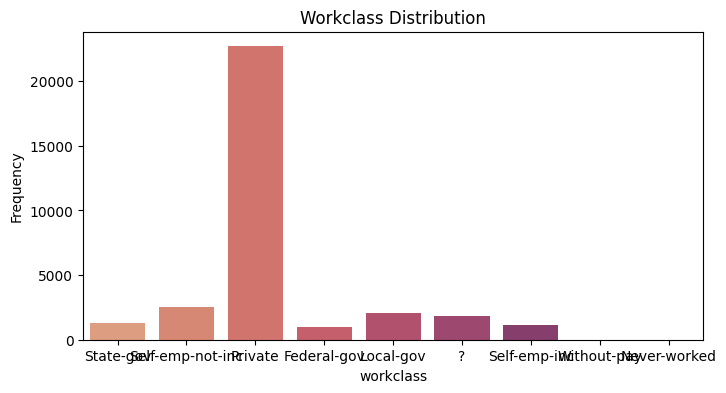

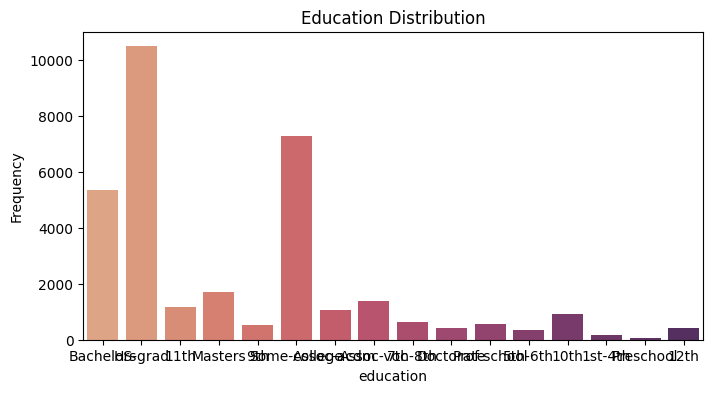

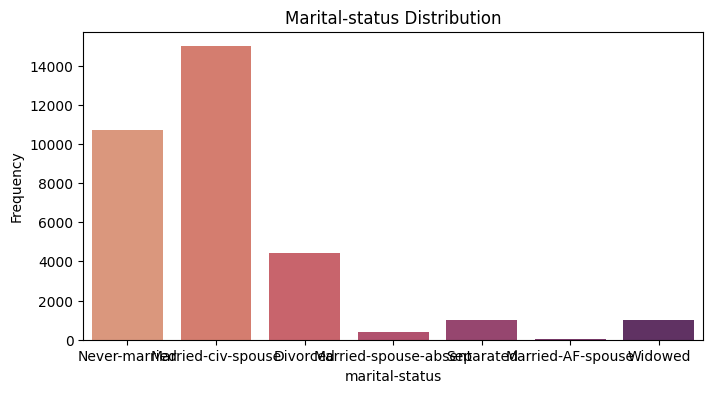

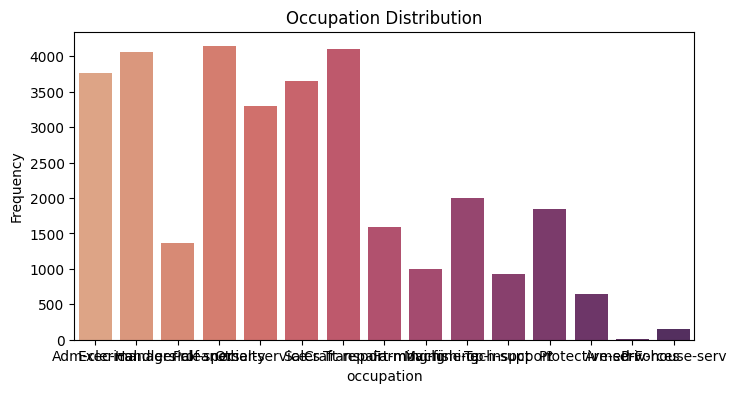

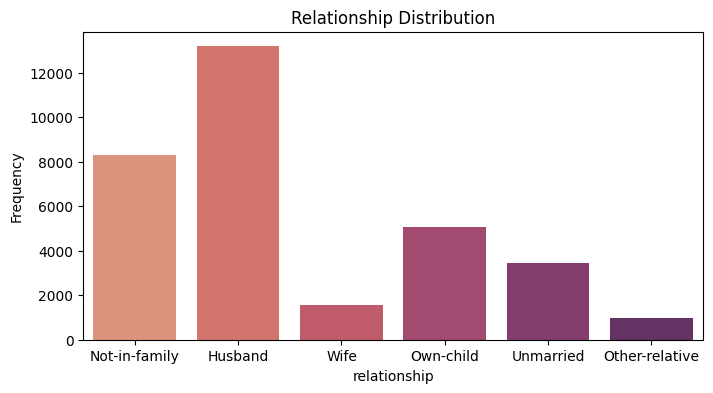

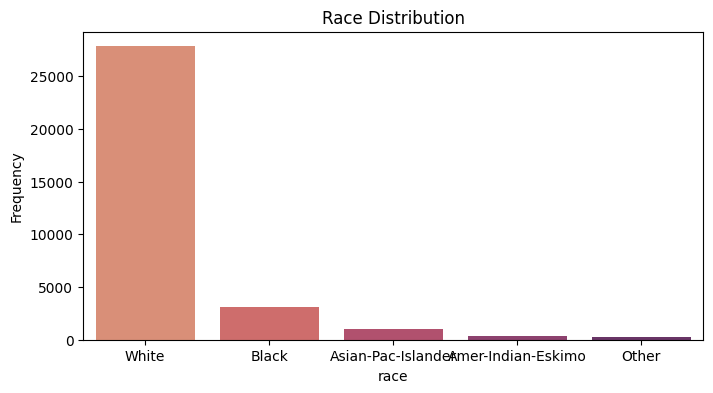

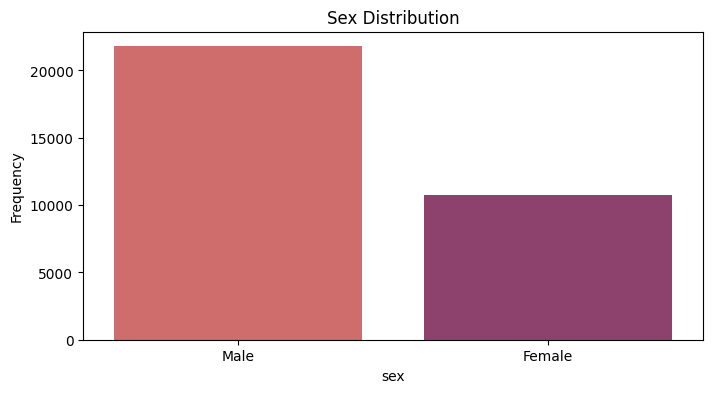

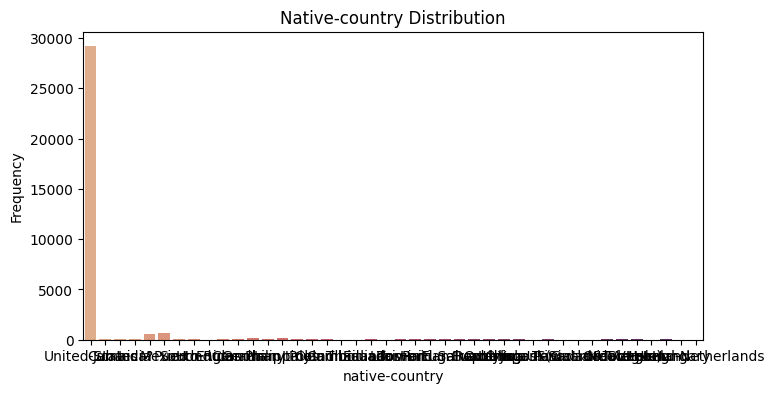

In [65]:
for col in categorical_cols:
    cat_distribution(adult, col)

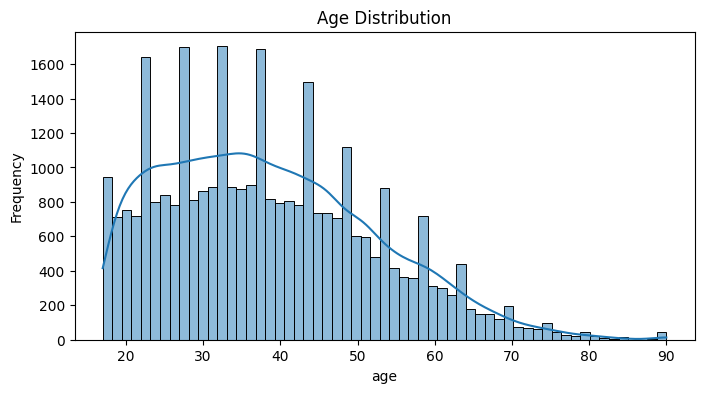

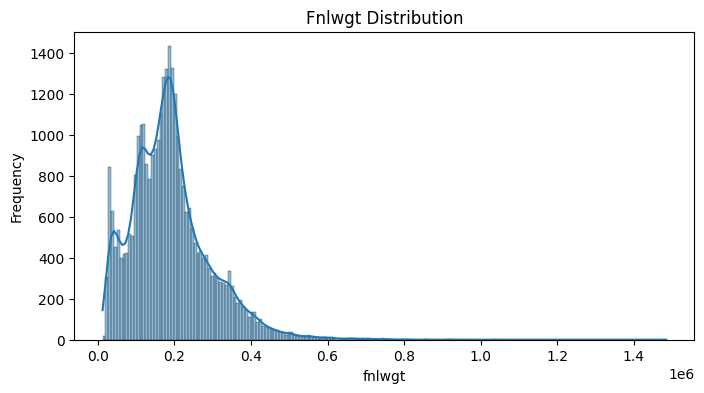

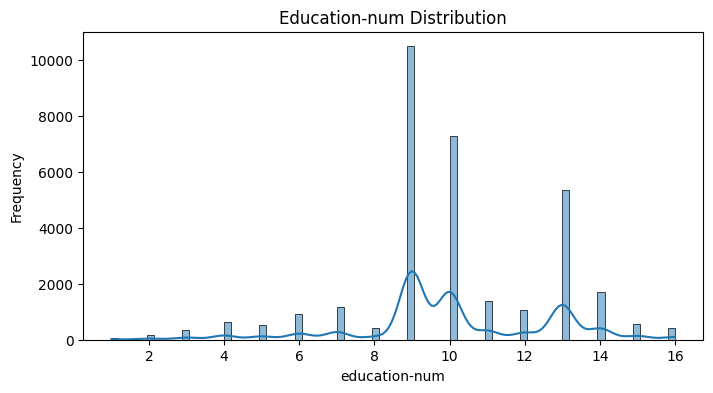

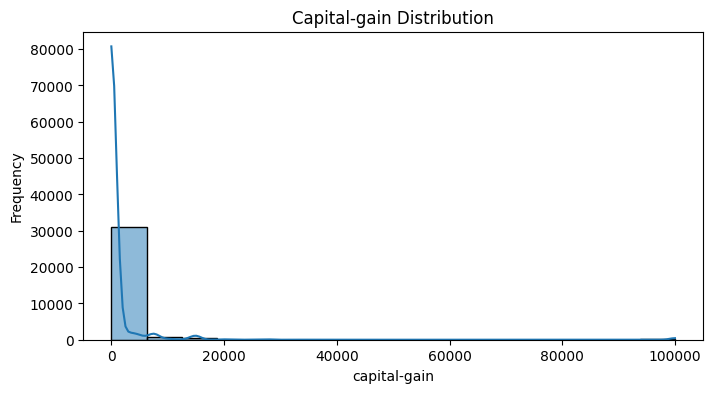

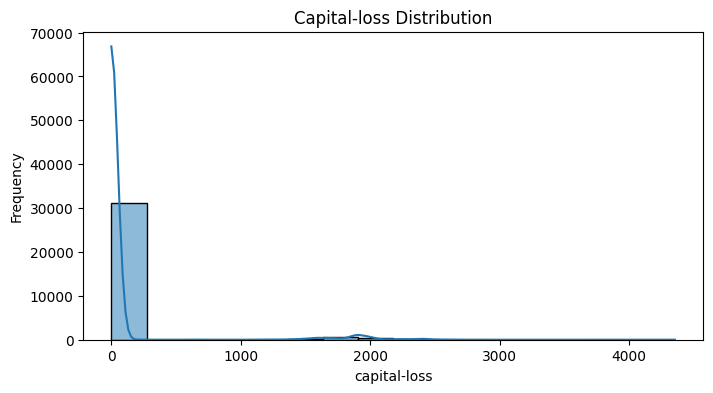

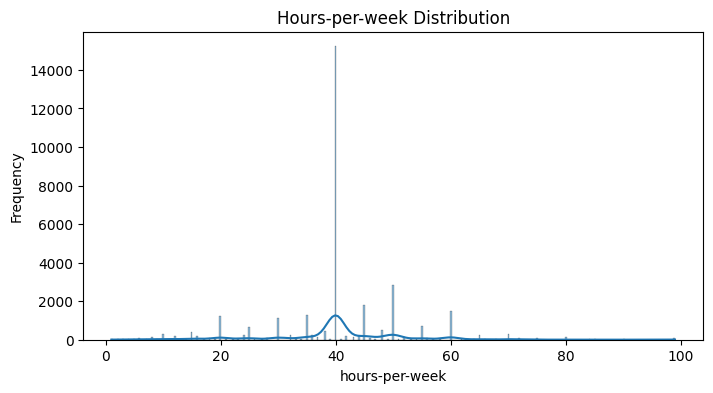

In [67]:
for col in numerical_cols:
    num_distribution(adult, col)

## Data Preprocessing and Feature Engineering

- **Scale Numeric Variables** : Numerical variables will be scaled to ensure that the model is not biased towards
   variables with higher magnitudes in the features.

- **Reduce Categories** : Categorical variables with high cardinality are reclassified to give less categories.

- **Label Encoding** : Categorical variables are encoded with numeric data. I choose target encoding here.

In [70]:
# Scaling the numerical columns
scaler = MinMaxScaler()
adult[numerical_cols] = scaler.fit_transform(adult[numerical_cols])

In [ ]:
# Reducing Cardinality of High Cardinality Categorical Columns

In [ ]:
# Target Encoding the Categorical Columns